<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Авторы материала: Юрий Кашницкий (@yorko) и Максим Уваров (@maxis42). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1bXgaJRh4naJOGzE_Li2k50TN0kOPJdNhMtHl6H4t3Lk/edit).**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

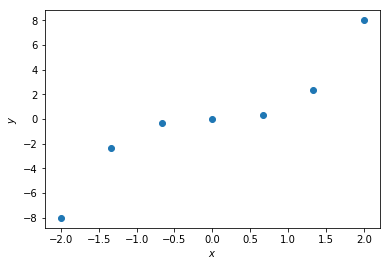

In [55]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [22]:
X, y

(array([-2.        , -1.94202899, -1.88405797, -1.82608696, -1.76811594,
        -1.71014493, -1.65217391, -1.5942029 , -1.53623188, -1.47826087,
        -1.42028986, -1.36231884, -1.30434783, -1.24637681, -1.1884058 ,
        -1.13043478, -1.07246377, -1.01449275, -0.95652174, -0.89855072,
        -0.84057971, -0.7826087 , -0.72463768, -0.66666667, -0.60869565,
        -0.55072464, -0.49275362, -0.43478261, -0.37681159, -0.31884058,
        -0.26086957, -0.20289855, -0.14492754, -0.08695652, -0.02898551,
         0.02898551,  0.08695652,  0.14492754,  0.20289855,  0.26086957,
         0.31884058,  0.37681159,  0.43478261,  0.49275362,  0.55072464,
         0.60869565,  0.66666667,  0.72463768,  0.7826087 ,  0.84057971,
         0.89855072,  0.95652174,  1.01449275,  1.07246377,  1.13043478,
         1.1884058 ,  1.24637681,  1.30434783,  1.36231884,  1.42028986,
         1.47826087,  1.53623188,  1.5942029 ,  1.65217391,  1.71014493,
         1.76811594,  1.82608696,  1.88405797,  1.9

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график. Тут без `sklearn` – разбираемся просто с ручкой, бумажкой и Python, если надо.

In [4]:
# Ваш код здесь


Ответ: у=0. Т.к. все точки в одном листе, а среднее всех точек = 0.

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [8]:
# Ваш код здесь
group_1 = y[X < 0]
group_2 = y[X >= 0]

mean_y_for_group_1 = group_1.mean()
mean_y_for_group_2 = group_2.mean()

t = np.arange(-2, 2, 0.1)



Пусть a(Х) - ответ алгоритма на множестве Х. Тогда для X = [-2, 0) a=-32/9, а для Х = [0, 2] a=32/12.

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), $|X|$, $|X_l|$, $|X_r|$ - размеры соответствующих выборок, а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

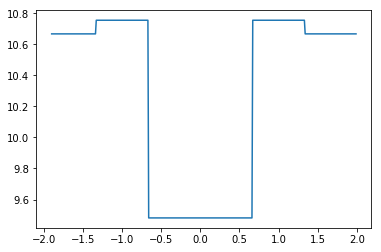

In [60]:
def regression_var_criterion(X, y, t):
    X_l = y[X < t]
    X_r = y[X >= t]
    X_size, X_l_size, X_r_size = X.size, X_l.size, X_r.size
    return np.std(y)**2 - X_l_size * np.std(X_l)**2 / X_size - X_r_size * np.std(X_r)**2 / X_size

t = np.arange(-1.9, 2, 0.01)
Q = np.array([regression_var_criterion(X, y, t_) for t_ in t])

plt.plot(t, Q)

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- Нет

Ответ: нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

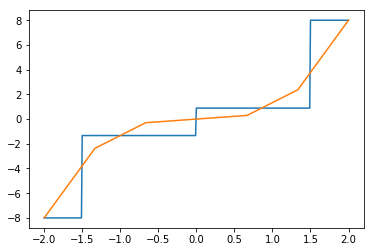

In [61]:
# Ваш код здесь
def foo(T):
    Y = []
    for t in T:
        if t < -1.5:
            Y.append(y[X < -1.5].mean())
        if -1.5 <= t < 0:
            Y.append(y[(X >= -1.5) & (X < 0)].mean())
        if 0 <= t < 1.5:
            Y.append(y[(X >= 0) & (X < 1.5)].mean())         
        if t >= 1.5: 
            Y.append(y[X >= 1.5].mean())
    return np.array(Y)

T = np.arange(-2, 2.01, 0.01)
Y = foo(T)
plt.plot(T, Y)
plt.plot(X, y)

**<font color='red'>Вопрос 2.</font> Из какого числа отрезков состоит график (необходимо считать как горизонтальные, так и вертикальные прямые), изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- 7
- 8

Ответ: 7

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [32]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [33]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах" (полных лет), а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`. Исходные признаки `cholesterol` и `gluc` после кодирования использовать не нужно.

In [34]:
# Ваш код здесь
df['age_years'] = df.age // 365.25
df = pd.concat([df, pd.get_dummies(df.cholesterol, prefix='cholesterol'), pd.get_dummies(df.gluc, prefix='gluc')], axis=1)
df.drop(['gluc', 'cholesterol'], axis='columns', inplace=True)
X = df.drop(['cardio', 'age'], axis=1)
y = df.cardio
X.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50.0,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55.0,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,51.0,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48.0,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,47.0,1,0,0,1,0,0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=17) # Ваш код здесь

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Названия файлов писать без кавычек, для того чтобы работало в jupyter notebook. Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [36]:
# Ваш код здесь
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)
export_graphviz(tree, 'tree.dot', feature_names=X.columns, filled=True)
!dot -Tpng tree.dot -o tree.png

<img src=tree.png>

**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- age, ap_hi, chol=3

Ответ: 4

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [37]:
# Ваш код здесь
accuracy_score(tree.predict(X_valid), y_valid)

0.72128571428571431

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [48]:
tree_params = {'max_depth': list(range(2, 11))} #, 
               # 'max_features': list(range(4, 7))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=17), 
                         cv=5, 
                         param_grid=tree_params).fit(X_train, y_train) # Ваш код здесь

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


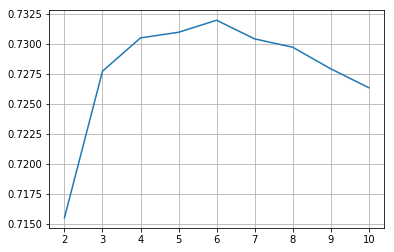

In [17]:
# Ваш код здесь
depth_list, mean_list = [], []
for depth in tree_grid.grid_scores_:
    depth_list.append(depth[0]['max_depth'])
    mean_list.append(depth[1])
    
plt.plot(depth_list, mean_list)
plt.grid()

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [18]:
# Ваш код здесь
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 6}, 0.73195918367346935)

**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева пик `accuracy`, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?**
- да, да
- да, нет
- нет, да
- нет, нет

In [19]:
acc1 = accuracy_score(tree.predict(X_valid), y_valid)
acc2 = accuracy_score(tree_grid.best_estimator_.predict(X_valid), y_valid)
print((acc2 - acc1) * 100. / acc1)

0.627186901697


In [24]:
acc2, acc1

(0.72580952380952379, 0.72128571428571431)

Ответ: да, нет

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Если значение возраста или артериального давления не попадает ни в один из интервалов, то все бинарные признаки будут равны нулю. Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках (исходные признаки не берем).

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [20]:
# Ваш код здесь
DF = pd.DataFrame()
DF['age_group_1'] = np.int8((45 <= df.age_years) & (df.age_years < 50))
DF['age_group_2'] = np.int8((50 <= df.age_years) & (df.age_years < 55))
DF['age_group_3'] = np.int8((55 <= df.age_years) & (df.age_years < 60))
DF['age_group_4'] = np.int8((60 <= df.age_years) & (df.age_years < 65))
DF['ap_hi_1'] = np.int8((120 <= df.ap_hi) & (df.ap_hi < 140))
DF['ap_hi_2'] = np.int8((140 <= df.ap_hi) & (df.ap_hi < 160))
DF['ap_hi_3'] = np.int8((160 <= df.ap_hi) & (df.ap_hi < 180))
DF['cholesterol_1'] = df.cholesterol_1
DF['cholesterol_2'] = df.cholesterol_2
DF['cholesterol_3'] = df.cholesterol_3
DF['smoke'] = df.smoke
DF['male'] = np.int8((df.gender == 2))
DF.fillna(0, inplace=True)
DF.head(10)

,age_group_1,age_group_2,age_group_3,age_group_4,ap_hi_1,ap_hi_2,ap_hi_3,cholesterol_1,cholesterol_2,cholesterol_3,smoke,male
0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1
1,0,0,1,0,0,1,0,0.0,0.0,1.0,0.0,0
2,0,1,0,0,1,0,0,0.0,0.0,1.0,0.0,0
3,1,0,0,0,0,1,0,1.0,0.0,0.0,0.0,1
4,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
5,0,0,1,0,1,0,0,0.0,0.0,0.0,0.0,0
6,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0,0
7,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0,1
8,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0
9,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0


In [21]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(DF, y)
export_graphviz(tree, 'tree1.dot', feature_names=DF.columns, filled=True)
!dot -Tpng tree1.dot -o tree1.png

<img src=tree1.png>

Ответ: артериальное давление от 140 до 160, ответ 3